# 使用kmeans算法对客户信息进行聚类
基本流程
1. 读取数据
2. 数据可视化
3. 数据预处理
4. 使用kmeans算法对客户信息进行聚类
5. 使用轮廓系数来评估聚类效果
6. 结果分析

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

### 读取数据
使用pandas读取数据，可见数据集有112条数据，每条数据包含两个属性:年龄和收入。而且数据集中没有缺失值

In [4]:
client_data=pd.read_excel('../../dataset/client.xlsx')
client_data.rename(columns={'年龄(岁)':'age','收入(万元)':'income'},inplace=True)# 更改列名
print(client_data.info())
client_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     112 non-null    int64
 1   income  112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB
None


,age,income
0,50,66
1,44,51
2,30,56
3,46,50
4,32,50


In [5]:
client_data.describe()

,age,income
count,112.000000,112.000000
mean,37.187500,43.625000
std,8.048872,16.220955
min,21.000000,15.000000
25%,30.000000,27.750000
50%,37.500000,48.500000
75%,44.000000,54.250000
max,52.000000,74.000000


### 数据可视化
绘制散点图，大致观测数据的分布情况,从图中可以看出数据可大致分为两类，后续kmeans中的聚类个数可设置为两类

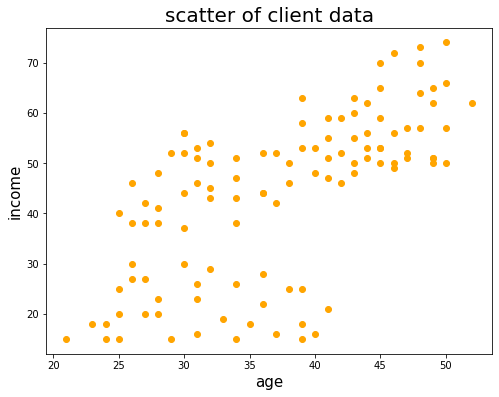

In [6]:
plt.figure(figsize=(8,6))
plt.title('scatter of client data',fontsize=20)
plt.ylabel('income',fontsize=15)
plt.xlabel('age',fontsize=15)
plt.scatter(client_data['age'],client_data['income'],c='orange',marker='o',label='client')

### 数据预处理
由于KMeans算法是基于距离的算法，不同的特征尺度可能会影响聚类结果。因此，通常需要对数值特征进行标准化处理，使得所有特征都在同一尺度上。

这里使用z-score对特征进行标准化处理，由于年龄和收入均为连续型数据，因此可以直接使用z-score标准化方法。

In [7]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
client_data=scaler.fit_transform(client_data[['age','income']])

In [8]:
print(client_data[:5])

[[ 1.59899225  1.38558814]
 [ 0.85019588  0.45670223]
 [-0.89699565  0.76633087]
 [ 1.09979467  0.39477651]
 [-0.64739686  0.39477651]]


###  使用kmeans算法对客户信息进行聚类
设置聚类中心个数为2，初始质心的选择为随机

In [9]:
model=KMeans(n_clusters=2,init='random',random_state=10).fit(client_data)
client_label=model.labels_
client_cluster=model.cluster_centers_
print(client_label)

[1 1 0 1 0 0 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 0 1 0 1 0 0 1 0 1
 1 0 0 1 1 0 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0
 0]


In [10]:
print(client_cluster)

[[-0.7846762  -0.68376323]
 [ 0.90539561  0.78895758]]


#### 绘制柱状图，将聚类结果可视化

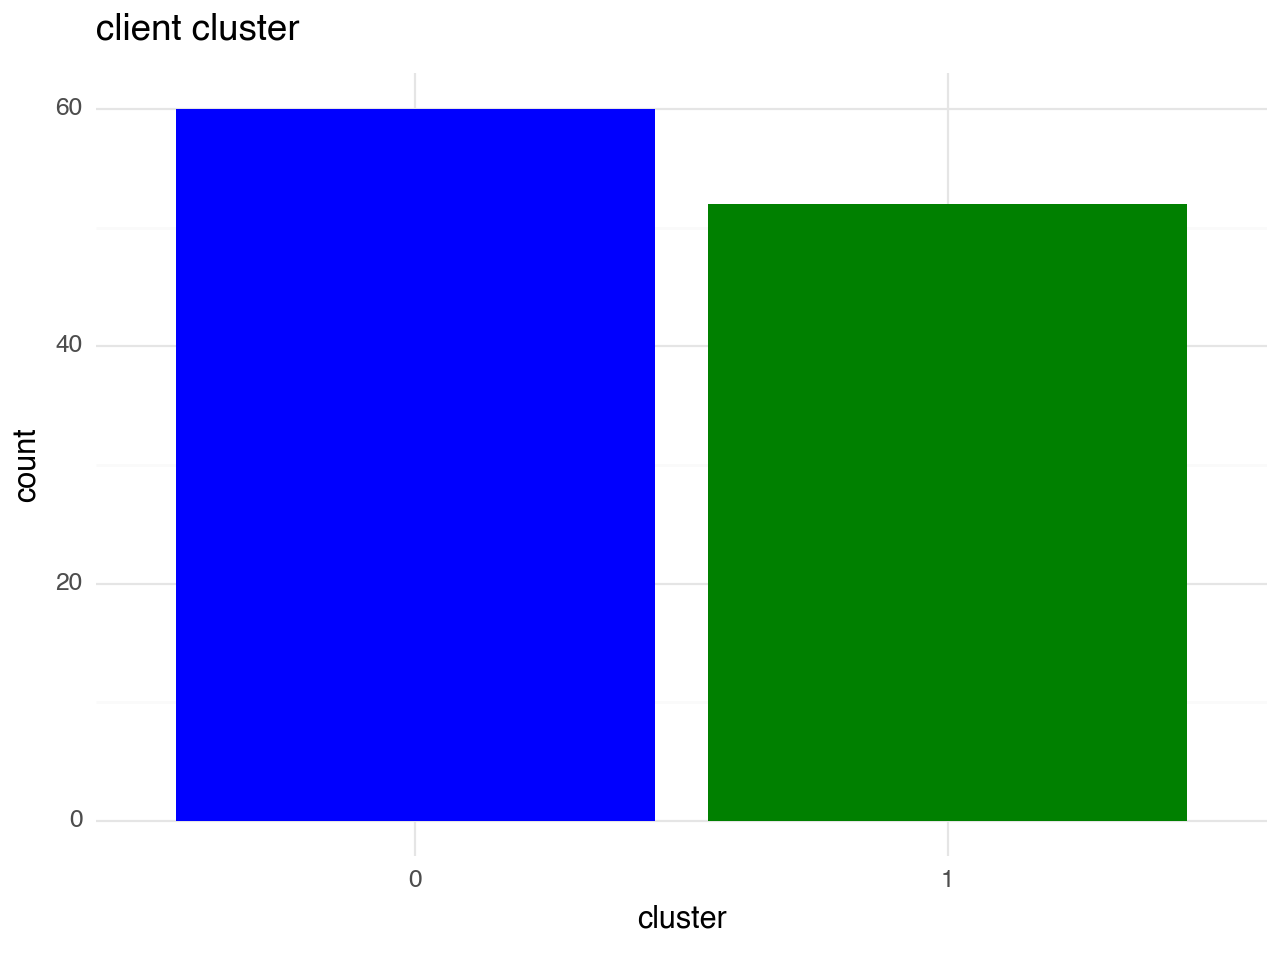

<Figure Size: (640 x 480)>

In [11]:
from plotnine import *
client_label_dataframe=pd.DataFrame({'clusters':client_label})
client_label_dataframe['clusters']=client_label_dataframe['clusters'].astype('category')
(ggplot(client_label_dataframe,aes(x='clusters'))+geom_bar(fill=['blue','green'])+theme_minimal()+labs(title='client cluster',x='cluster',y='count'))

将数据进行逆标准化，展示聚类中心数据。

结果分析:
- 第一个聚类中心的年龄较小，收入较低 
- 第二个聚类中心的年龄较大，收入较高

In [12]:
central_cluster=pd.DataFrame(client_cluster,columns=['age','income']).copy()
central_cluster_inverse=pd.DataFrame(scaler.inverse_transform(central_cluster),columns=['age','income'])
central_cluster_inverse

,age,income
0,30.900000,32.583333
1,44.442308,56.365385


### 使用轮廓系数来评估聚类效果
对于每个样本，轮廓系数需要计算两个值$a,b$：<br>
- $a$:这个样本和同簇内其它样本间的平均距离
- $b$:这个样本和距离第二近的簇内所有样本间的平均距离
- 单个样本的轮廓系数计算如下：$s = \frac{b - a}{\max(a, b)}$     
- 所有样本的轮廓系数则由每个样本的轮廓系数求平均得到


**轮廓系数取值在-1到1之间，越接近1说明聚类效果越好**

In [13]:
from sklearn import metrics
silhouette_score=metrics.silhouette_score(client_data,client_label)
print('k为2时，轮廓系数为%.4f'%silhouette_score)

for i in range(3,6):
    model=KMeans(n_clusters=i,init='random',random_state=10).fit(client_data)
    print('当前k为%d时，轮廓系数为%.4f'%(i,metrics.silhouette_score(client_data,model.labels_)))

k为2时，轮廓系数为0.5234
当前k为3时，轮廓系数为0.5042
当前k为4时，轮廓系数为0.5137
当前k为5时，轮廓系数为0.4032
